## ------- Import Library ---------

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from wordcloud import WordCloud

## Read Dataset

In [17]:
hasil_labelling = pd.read_csv('hasil_labelling.csv')
df = pd.read_csv('data_tweet_final.csv')

# Deskripsi Data

## Missing Values

In [18]:
# Cek Missing value
df.isna().sum()

date                  0
username              0
tweet                 1
tweet_tokens          0
tweet_tokens_fdist    0
tweet_tokens_WSW      0
final_tweet           1
sentiment             1
dtype: int64

In [19]:
df.dropna(inplace=True)
df.isna().sum()

date                  0
username              0
tweet                 0
tweet_tokens          0
tweet_tokens_fdist    0
tweet_tokens_WSW      0
final_tweet           0
sentiment             0
dtype: int64

## Top 10 Username 

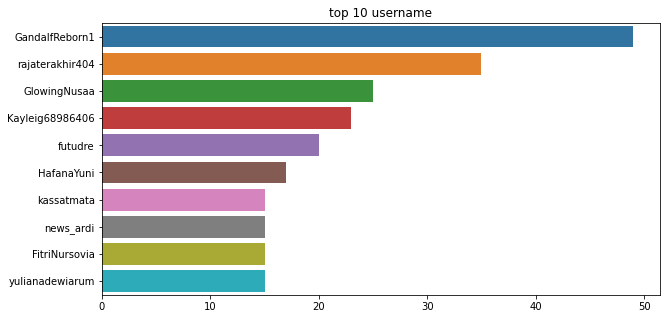

In [20]:
username_count = df['username'].value_counts()
username_count = username_count[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=username_count.values,y=username_count.index)
plt.title("top 10 username")
plt.show()

## WordCloud

Kata yang paling sering muncul

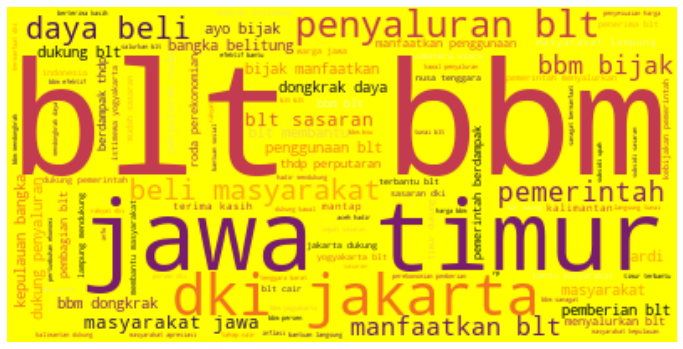

In [21]:
fig, axes = plt.subplots(ncols=1, figsize=(12, 10))
tokens_ = ' '.join(df['final_tweet'])
wc_ = WordCloud(max_words=100, background_color='yellow', max_font_size=100, colormap='inferno').generate(tokens_)
axes.axis("off")
axes.imshow(wc_, interpolation="bilinear")
plt.show()

# Random Forest

## Inisiasi X, dan y -----------

In [22]:
X = hasil_labelling['final_tweet']
y = hasil_labelling['sentiment_norm']

## TfidfVectorizer

In [23]:
tf = TfidfVectorizer().fit_transform(X)

## Model Selection

In [24]:
X_train,X_test,y_train,y_test = train_test_split(tf,y,random_state=0,test_size=0.2)

## Inisiasi Model

In [25]:
random_forest = RandomForestClassifier().fit(X_train,y_train)

## Predict, Confusion Matrix & Report

In [26]:
predict = random_forest.predict(X_test)
confusion_matrix(y_test,predict)

array([[  6,   3,   0],
       [  0,  61,   8],
       [  0,   5, 117]], dtype=int64)

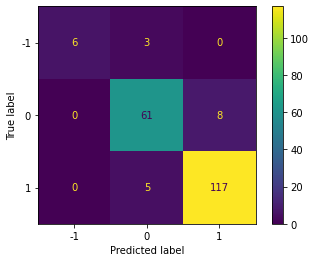

In [27]:
plot_confusion_matrix(random_forest,X_test,y_test)

In [28]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

          -1       0.67      1.00      0.80         6
           0       0.88      0.88      0.88        69
           1       0.96      0.94      0.95       125

    accuracy                           0.92       200
   macro avg       0.84      0.94      0.88       200
weighted avg       0.92      0.92      0.92       200



In [14]:
def label_sentiment(sentiment):
    if sentiment == 1:
        return "Positif"
    elif sentiment == 0:
        return "Netral"
    else:
        return "Negatif"
df['sentiment_label'] = df['sentiment'].apply(label_sentiment)

<AxesSubplot:xlabel='sentiment_label', ylabel='count'>

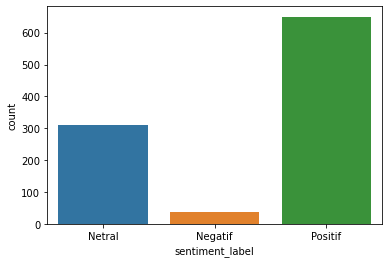

In [15]:
sns.countplot(x=df['sentiment_label'])

In [16]:
s = df.sentiment_label
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Positif,650,0.651303,65.1%
Netral,311,0.311623,31.2%
Negatif,37,0.037074,3.7%
